# Homework 2


## Linear Time Iteration

A deterministic one-dimensional linear model for inflation is written in the form:

$$\pi_{t+1} - (\lambda_1 + \lambda_2) \pi_t + \lambda_1 \lambda_2 \pi_{t-1} = 0$$

with $0<\lambda_1<\lambda_2$
Here, inflation is backward looking in the sense that inflation $\pi_t$ will depend on past inflation $\pi_{t-1}$.
The solution takes the form $\forall t, \space \pi_t = \lambda \pi_{t-1}$ where $\lambda$ is a constant to be determined.

1. __(Theory) Write down the second order equation $P(\lambda)=0$, which characterizes $\lambda$. What are the roots of polynomial $P$ ?__
    

$\forall t$, the constant $\lambda$ is characterized through: $\pi_{t} = \lambda \pi_{t-1}$
This is equivalent to writing: 
\begin{align*}
\pi_{t+1} &= \lambda \pi_{t} \\
(\lambda_{1} + \lambda_{2}) \pi_{t} - \lambda_{1}\lambda_{2}\pi_{t-1} &= \lambda \pi_{t} \\
 \pi_{t} &= \frac{-\lambda_{1}\lambda_{2}}{\lambda - (\lambda_{1} + \lambda_{2})}\pi_{t-1}
\end{align*}

And as such, we have: 
\begin{align*}
\frac{-\lambda_{1}\lambda_{2}}{\lambda - (\lambda_{1} + \lambda_{2})} &= \lambda \\ 
-\lambda_{1}\lambda_{2} &= \lambda (\lambda - (\lambda_{1} + \lambda_{2})) \\
\lambda^{2} - (\lambda_{1} + \lambda_{2})\lambda + \lambda_{1}\lambda_{2}   &= 0
\end{align*}

We thus have : $P(\lambda) = \lambda^{2} - (\lambda_{1} + \lambda_{2})\lambda + \lambda_{1}\lambda_{2} $ 

We can then write this polynomial's $\Delta$ : $\Delta = (\lambda_{1} + \lambda_{2})^{2} - 4\lambda_{1}\lambda_{2} = (\lambda_{1} - \lambda_{2})^{2} > 0 $, because $\lambda_{1} \neq \lambda_{2}$. As such, the polynomial $P$ has 2 real roots, which are: 

$ r_{1} = \frac{(\lambda_{1} + \lambda_{2}) - (\lambda_{1} - \lambda_{2})}{2} = \lambda_{2}$ and $ r_{2} = \frac{(\lambda_{1} + \lambda_{2}) + (\lambda_{1} - \lambda_{2})}{2} = \lambda_{1}$ 

The 2 roots of the polynomial $P$ are thus $\lambda_{1}$ and $\lambda_{2}$.


2. __(Theory 2) Justify that $T(x) = \frac{-\lambda_1\lambda_2}{x-\lambda_1-\lambda_2}$ is the time iteration operator. Show that it admits two fixed points, but that only one of them is stable by computing $|T^{\prime}|$.__

First, we know that the time iteration operator is the function which will allow us to compute $\lambda$ from any initial guess $\tilde{\lambda}$. And as inflation is backward looking, it describes a recursive relationship between a guess for $\lambda$ at time $t$ and a guess for $\lambda$ at time $t-$. We can thus use the previous question's result $ \pi_{t} = \frac{-\lambda_{1}\lambda_{2}}{\lambda - (\lambda_{1} + \lambda_{2})}\pi_{t-1}$ (where we started from $\pi_{t+1}=\lambda \pi_{t}$) to conclude that $T$ is indeed the one described in this question. 

We can then compute this operator's fixed points by solving the equation $T(x) = x$, which is equivalent to : $\frac{-\lambda_{1}\lambda_{2}}{x-\lambda_{1}-\lambda_{2}}=x$. 
Using the previous question's results, we find that T admits 2 fixed points which are $\lambda_{1} $ and $\lambda_{2}$. 

We then study these fixed points' stability by computing: 
$$ |T'(x)|= \left|\frac{\lambda_{1}\lambda_{2}}{(x-\lambda_{1}-\lambda_{2})^{2}}\right| $$ 
We then have $ |T'(\lambda_{1})|= \frac{\lambda_{1}}{\lambda_{2}} <1 $ and $ |T'(\lambda_{2})|= \frac{\lambda_{2}}{\lambda_{1}}>1 $ 
As such, only the fixed point associated with $\lambda_{1}$ is stable.

It is actually possible (and easy) to show that the series $(x_n)$ defined recursively by $x_n = T(x_{n-1})$ converges to $\lambda_1$ starting from any initial point $x_0$, except from $\lambda_2$. This method of computing a solution is called *linear time iteration*.

3. __Implement the linear time iteration and illustrate its convergence graphically by plotting its progress,  starting from various levels of $x_0$. Show one case with $\lambda_1<\lambda_2<1$, one with $\lambda_1<1<\lambda_2$ and one with $1<\lambda_1<\lambda_2$.__

In [1]:
using Plots
using LaTeXStrings

In [2]:
### FUNCTIONS USED TO GENERATE TIME ITERATIONS
function time_iter_step(lambda1::Float64,lambda2::Float64,xt::Float64)
    xt_1=-(lambda1*lambda2)/(xt -lambda1-lambda2)
    return xt_1
end

function time_iteration(lambda1::Float64,lambda2::Float64,x0::Float64,tol::Float64,N::Int64)
    x=[]
    push!(x,x0)
    for i=1:N
        push!(x,time_iter_step(lambda1,lambda2,x[i]))
        if abs(x[i+1]-x[i]) < tol
            break
        end 
        
    end
    return x
end

function time_iter_many(lambda1::Float64,lambda2::Float64, tol::Float64, N::Int64)
    sims=time_iteration(lambda1,lambda2,0.0,tol,N)
    for i in LinRange(0.1,10,19)
        sims=hcat(sims,time_iteration(lambda1,lambda2,i,tol,N))
    end 
    return sims
end 

time_iter_many (generic function with 1 method)

We will pick $\lambda_{2}$ and the initial $x_0$ such as there is one $x_0=\lambda_{2}$ to illustrate the unstability of $\lambda_{2}$.

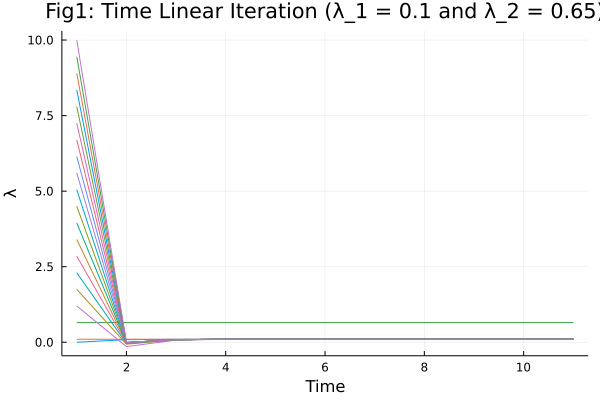

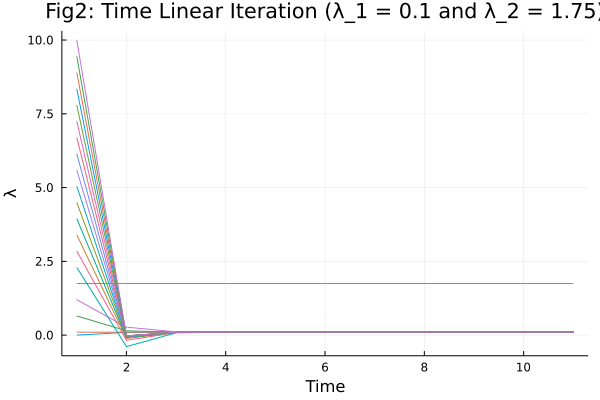

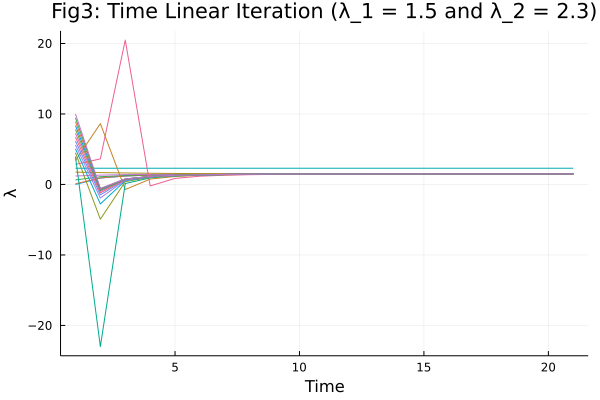

In [3]:
#### FIRST CASE λ_1 < λ_2 < 1

N=10
lambda1=0.1
lambda2=0.65
tol=0.0

sims=time_iter_many(lambda1,lambda2,tol,N)

fig1 = plot( x= 1:N, sims[:,1], 
legend = false, xlabel = "Time", ylabel = "λ", 
title = "Fig1: Time Linear Iteration (λ_1 = $lambda1 and λ_2 = $lambda2)")

for i in 2:20
    plot!(fig1, x=1:N, sims[:,i])
end

display(fig1)


#### SECOND CASE λ_1 < 1 < λ_2

N=10
lambda1=0.1
lambda2=1.75

sims=time_iter_many(lambda1,lambda2,tol,N)

fig2 = plot( x= 1:N, sims[:,1], 
legend = false, xlabel = "Time", ylabel = "λ", 
title = "Fig2: Time Linear Iteration (λ_1 = $lambda1 and λ_2 = $lambda2)")

for i in 2:20
    plot!(fig2, x=1:N, sims[:,i])
end

display(fig2)

#### THIRD CASE 1 < λ_1 < λ_2

N=20
lambda1=1.5
lambda2=2.3

sims=time_iter_many(lambda1,lambda2,tol,N)

fig3 = plot( x= 1:N, sims[:,1], 
legend = false, xlabel = "Time", ylabel = "λ", 
title = "Fig3: Time Linear Iteration (λ_1 = $lambda1 and λ_2 = $lambda2)")

for i in 2:20
    plot!(fig3, x=1:N, sims[:,i])
end

display(fig3)

4. __A model is well specified if it admits a unique non-diverging solution. What method would you propose to check that the solution obtained by linear time-iteration is convergent and unique?__


- convergence: take the result of the time iteration algorithm, apply perturbation to $\pi_t$ and plug it into the recursive equation to see if it relaxes to equilibrium. 
- uniqueness: explore parameter space 

5. __(Bonus) Implement an *improved* linear time iteration algorithm, that is a Newton descent applied to $x-T(x)$ and discuss its convergence.__

## Dividend Pricing

A dividend process is described by $d_t=\exp(\epsilon) (d_{t-1})^\rho$ with $\rho=0.9$ and $\epsilon$ a normal i.i.d. process with mean 0 and standard deviation 0.05.
Given discount rate $\beta=0.95$ our ultimate goal is to evaluate the risk neutral price of a right to the dividend, which satisfies:

$$p_t=d_t + \beta E_t \left[ p_{t+1} \right]$$

In functional form, we look for a function $p()$ such that

$$\forall d, \color{blue}{p}(d)=d+\beta E_{\epsilon} \left[ \color{red}{p}\left( \exp(\epsilon) (d)^\rho \right)\right]$$

The general algorithm, will consist in updating the price function on the left as a function of the price function on the right. It raises two challenges:
- integrate the term within the square brackets (we'll use quadrature)
- interpolate the price function so that it can be evaluated at any realisation of $\exp(\epsilon) (d)^\rho$

1. __Integration: discretize random shock $\epsilon_t$ with $K=5$ nodes and weights $(w_i, \epsilon_i)$ by using a gauss-hermite quadrature.
As an example, use this discretization to evaluate $\mathbb{E}\left(\epsilon^2\right)$ and $\mathbb{E}\left[ \exp(\epsilon)\right]$.__

In [4]:
using FastGaussQuadrature, LinearAlgebra, Distributions, Interpolations

In [5]:
### Discretization of ϵ_t
# We compute the weights used for the Gauss-Hermite quadrature 
x,w = gausshermite(5)

# We compute the appropriate transformations for the normal law 
w_chi=w/sqrt(π)
x_chi=x*(sqrt(2)*0.05)

5-element Vector{Float64}:
 -0.1428485006936403
 -0.0677813089987134
 -3.140184917367551e-17
  0.0677813089987134
  0.1428485006936403

In [6]:
### Evaluation of E(ϵ^2) 
f_square(y)=y^2
I_square = dot(w_chi, f_square.(x_chi))
println(sqrt(I_square)≈0.05) # we check the result to see if it is coherent with σ

### Evaluation of E[exp(ϵ)]
f_exp(y)=exp(y)
I_exp = dot(w_chi, f_exp.(x_chi))

true


1.0012507815756226

2. __Interpolation: for $N=20$, propose a regular grid $(d_1, ... d_N)$ for $d$ that is large enough to contain a large fraction of of the realizations of $d_t$. An function $p()$ will be identified with an $N$-components vector `p`$=(p_1, ..., p_N)=(p(d_1), ..., p(d_N))$ and linear interpolation will be used to evaluate `p` outside of the grid points (you can use library `interpolations.jl`) . Choose an initial guess for $p()$, for instance $p(d)=d^2$ and plot the interpolated function.__

<mark>Hint</mark>: given a vector of points `x` and matching vector of values `y`, you can use `itp = LinearInterpolation(x, y, extrapolation_bc = Line())` to construct a smooth function, which equals `y` on `x`. You can then interpolate at any point or vector of points `z` with `itp(z)`.


In [7]:
### Proposition for the regular grid : 

## we could use the fact that ϵ ~ N(0.0, 0.05): as such, ϵ \in [-0.1;0.1] with probability 0.95 and as such exp(ϵ) \in [exp(-0.1);exp(0.1)];
# we could then say that: exp(-0.1)^(t*0.9+1) < d_t < exp(0.1)^(t*0.9+1) almost certainly; exp(-0.1)^(t*0.9+1) -> 0; but exp(0.1)>1, which is a problem.

## we thus use a very elementary Monte-Carlo simulation for d_t to pick boundaries for our grid 
bound_low=0.6
bound_up=1.4
prop_thres=[]
for t in LinRange(10,1000,100)
    for j in 1:100
        exp_ϵ_sample = exp.(rand(Normal(0.0,0.05),trunc(Int,t)))

        d_sample = []
        push!(d_sample,exp_ϵ_sample[1])

        for i in 2:length(exp_ϵ_sample)
            push!(d_sample, exp_ϵ_sample[i]*(d_sample[i-1]^0.9))
        end 

        push!(prop_thres, length(d_sample[bound_low .< d_sample .< bound_up])/length(d_sample))

    end 
end 
println(mean(prop_thres))
# by a trial and error process, we pick the following interval : [0.6;1.4]; d_t is in this interval with a 0.99 probability in average

## Here is the final regular grid 
reg_grid=LinRange(0.6,1.4,20)

0.9984020266205939


20-element LinRange{Float64, Int64}:
 0.6,0.642105,0.684211,0.726316,0.768421,…,1.23158,1.27368,1.31579,1.35789,1.4

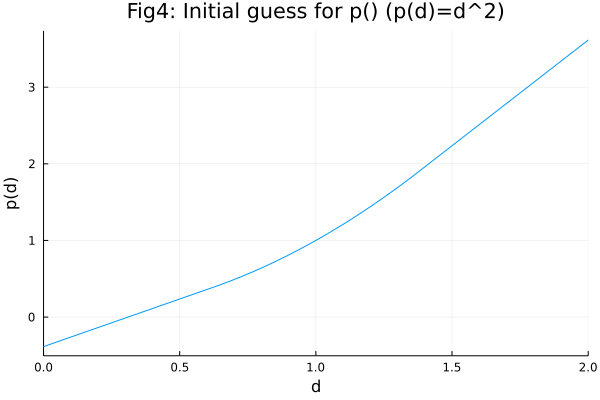

In [8]:
### We plot the initial guess for p()
# Interpolation
p_init(y)=y^2
p=p_init.(reg_grid)
itp=LinearInterpolation(reg_grid, p, extrapolation_bc=Line())

x_axis= LinRange(0.0,2.0,2000)
y_axis= itp.(x_axis)

fig4 = plot(x_axis, y_axis, xlims=(0.0,2.0),
legend = false, xlabel = "d", ylabel = "p(d)", 
title = "Fig4: Initial guess for p() (p(d)=d^2)")

display(fig4)

3. __Assuming vector `p0` represents the $p()$ function on the right, compute `p1` vector which represents the $p()$ function on the left. Call `T()` the function which map `p0` to `p1`.__

In [9]:
function T(p0::Vector{Float64}, reg_grid=reg_grid)
    itp=LinearInterpolation(reg_grid, p0, extrapolation_bc=Line())
    f_try(y,dt)=itp(exp(y)*dt^0.9)
    I_p(dt)= dot(w_chi, f_try.(x_chi,dt))
    p1=reg_grid+0.95*I_p.(reg_grid)
    return p1
end 

T (generic function with 2 methods)

4. __Find the equilibrium price `p` by iterating on `T()`. Plot.__

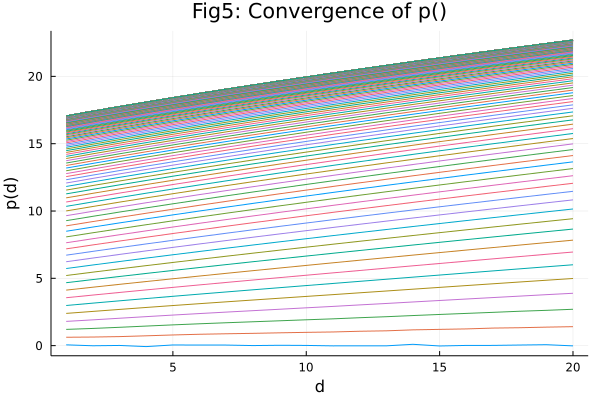

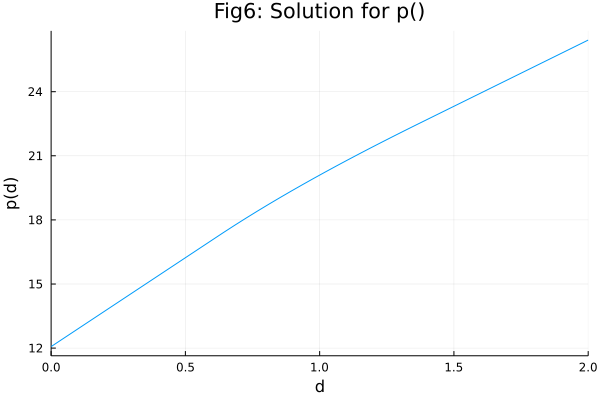

In [39]:
### We iterate on T() to find the solution p() to the problem
p_t=rand(Normal(0.0,0.05),20) # we initialize at p0=[d0(ω_i) for i in 1:20]
fig5=plot(x=reg_grid, p_t, legend=false,xlabel="d", ylabel="p(d)", title = "Fig5: Convergence of p()")

for i in 1:1000
    p_t_1=T(p_t)
    p_t=p_t_1
    plot!(fig5,x=reg_grid, p_t)
end 

display(fig5)

### We plot the final solution properly 
inter_p = LinearInterpolation(reg_grid, p_t, extrapolation_bc=Line())
x_axis= LinRange(0.0,2.0,2000)
y_axis= inter_p.(x_axis)
fig6=plot(x_axis, y_axis, xlims=(0.0,2.0), legend=false, xlabel="d", ylabel="p(d)", title = "Fig6: Solution for p()")
display(fig6)

5. __Bonus: justify why the function `T(p)` is actually linear in `p`. Use `IterativeSolver.jl` to solve directly the equation `p=T(p)` (check the doc...). Compare results and number of iterations with the precendent function.__

## Brock-Mirman Stochastic Growth model

Here is a neoclassical growth model with unpredictable shocks on productivity.

Social planner tries to solve:

$$\max E_t \left[ \sum_{n=0}^{\infty} \beta^n \log C_{t+n} \right]$$

s.t.

$$K_{t+1} = Y_t - C_t$$
$$Y_{t+1} = A_{t+1}K_{t+1}^\alpha$$

where $A_t$ is the level of productivity in period $t$. 
It can take  values $A^h=1.05$ and $A^l=0.95$. The transition between these two states are given by the matrix:
$$P = \begin{bmatrix}
0.9, 0.1\\
0.1, 0.9
\end{bmatrix}$$

We want to solve this problem by converting it into a discrete dynamic programming problem.

__Propose a plausible calibration__

__What are the states? What are the controls? Is it possible to bound them in a natural way? Propose a discretization scheme for:__
- __the states (a vector of values)__
- __the controls (for each state, a vector of possible values)__
- __the transitions (a deterministic function which computes the next state as a function of current state and control)__

__Write down the Bellman equation__

__How do you represent a policy function? Implement a value evaluation function.__

__Solve the model using Value Function Iteration. Plot the solution.__

__Implement Policy Improvement Steps. Compare convergence Speed.__

__Bonus: Propose some ideas to improve performances.__